<a href="https://colab.research.google.com/github/William3265/-/blob/master/%E7%92%B0%E5%A2%83%E5%BB%BA%E7%BD%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url ="https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
#y= w*x+b
x = data["YearsExperience"]
y = data["Salary"]
x

In [17]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=461b42c6e9272e8eaaf35f39c05f8a7c6bfa3cdda5c859f680d138d7848266c4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

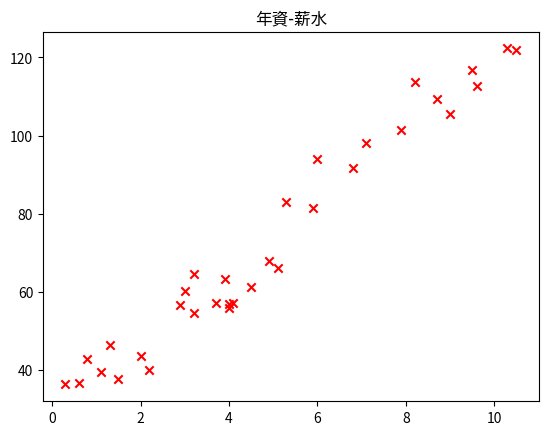

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")
plt.scatter(x,y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪")
plt.show()

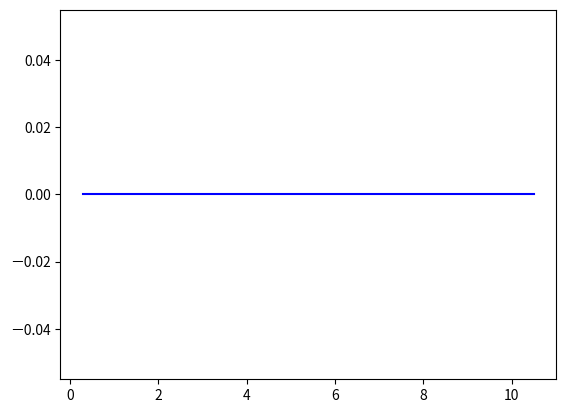

In [19]:
w=0
b=0
y_pred = x*w+b
plt.plot(x, y_pred, color="blue")
plt.show()